<a href="https://colab.research.google.com/github/riyakapil28/CODSOFT/blob/main/Copy_of_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import the necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#Loading the dataset

In [ ]:
Sales_data = pd.read_excel('/content/advertising.xlsx')

#Exploring the data

In [ ]:
Sales_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
Sales_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
Sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
# Assume we have a DataFrame df and we're interested in column 'A'
Outlier1= Sales_data['TV'].describe()

# Calculate Interquartile range (IQR)
IQR = Outlier1['75%'] - Outlier1['25%']

# Define bounds for the outliers
lower_bound = Outlier1['25%'] - 1.5 * IQR
upper_bound = Outlier1['75%'] + 1.5 * IQR

# Identify the outliers
outliers = Sales_data[(Sales_data['TV'] < lower_bound) | (Sales_data['TV'] > upper_bound)]


In [ ]:
print(outliers)

Empty DataFrame
Columns: [TV, Radio, Newspaper, Sales]
Index: []


In [ ]:
Outlier2 = Sales_data['Radio'].describe()

# Calculate Interquartile range (IQR)
IQR = Outlier2['75%'] - Outlier2['25%']

# Define bounds for the outliers
lower_bound = Outlier2['25%'] - 1.5 * IQR
upper_bound = Outlier2['75%'] + 1.5 * IQR

# Identify the outliers
outlier1 = Sales_data[(Sales_data['Radio'] < lower_bound) | (Sales_data['Radio'] > upper_bound)]

In [ ]:
print(outlier1)

Empty DataFrame
Columns: [TV, Radio, Newspaper, Sales]
Index: []


In [ ]:
Outlier3 = Sales_data['Newspaper'].describe()

# Calculate Interquartile range (IQR)
IQR = Outlier3['75%'] - Outlier3['25%']

# Define bounds for the outliers
lower_bound = Outlier3['25%'] - 1.5 * IQR
upper_bound = Outlier3['75%'] + 1.5 * IQR

# Identify the outliers
outlier3 = Sales_data[(Sales_data['Newspaper'] < lower_bound) | (Sales_data['Newspaper'] > upper_bound)]

In [ ]:
print(outlier3)

        TV  Radio  Newspaper  Sales
16    67.8   36.6      114.0   12.5
101  296.4   36.3      100.9   23.8


The above result indicates the outliers in the data.Hence we will remove them.

In [ ]:
Sales_data.drop([16,101], inplace=True)

#Preprocessing the data

In [ ]:
Sales_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
Sales_data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

#Data Visualization

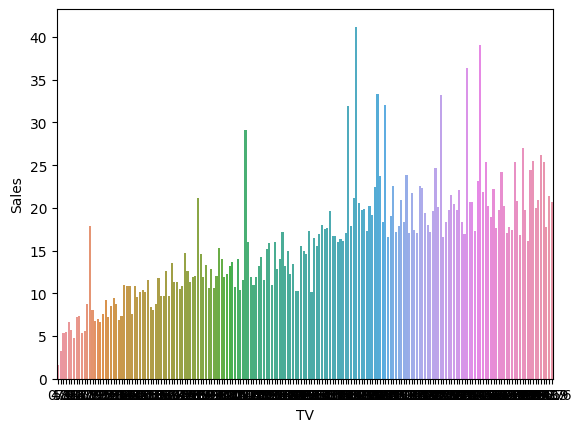

In [ ]:
#Sales using TV as a platform
import seaborn as sns
sales_by_TV = Sales_data.groupby('TV')['Sales'].sum().reset_index()
sns.barplot(x='TV', y='Sales', data=sales_by_TV)
plt.show()


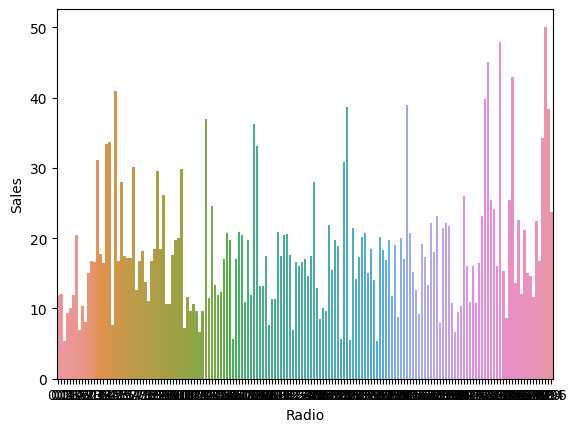

In [ ]:
#Sales using Radio as a platform
sales_by_Radio = Sales_data.groupby('Radio')['Sales'].sum().reset_index()
sns.barplot(x='Radio', y='Sales', data=sales_by_Radio)
plt.show()

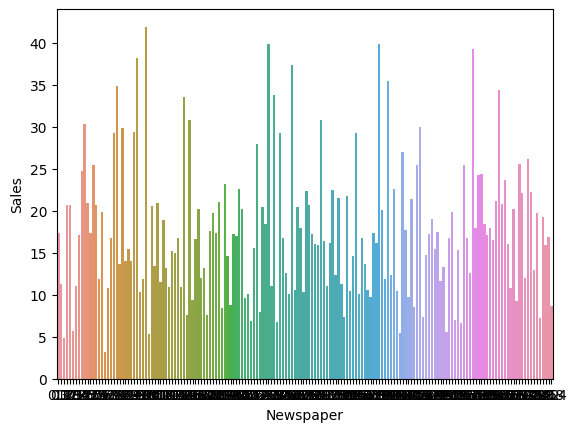

In [ ]:
#Sales using Newspaper as a platform
sales_by_Newspaper = Sales_data.groupby('Newspaper')['Sales'].sum().reset_index()
sns.barplot(x='Newspaper', y='Sales', data=sales_by_Newspaper)
plt.show()

In [ ]:
avg_sales = Sales_data.mean()


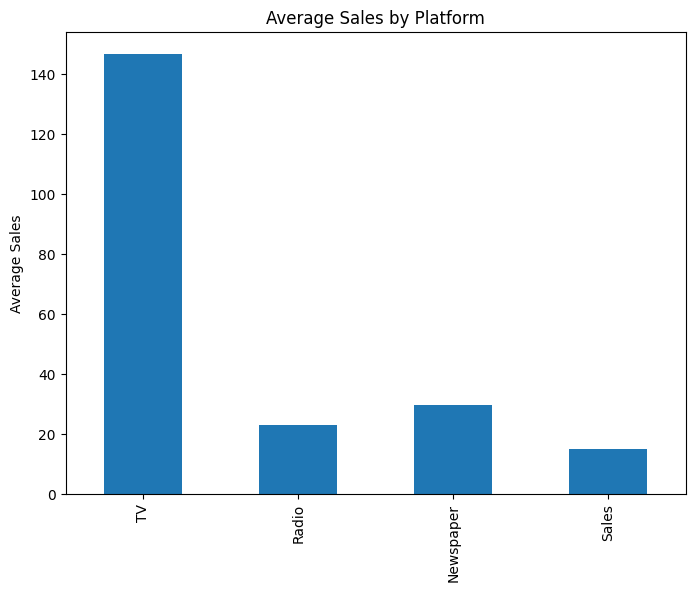

In [ ]:
avg_sales.plot(kind='bar', figsize=(8, 6))
plt.ylabel('Average Sales')
plt.title('Average Sales by Platform')
plt.show()


#ModelPrediction

In [ ]:
x = Sales_data.drop(columns= ['Sales'], axis=1)
y= Sales_data['Sales']


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(x_test)


In [ ]:
print(y_pred)

[15.06202574  8.49516683 16.2966903  14.67752369  9.55770843 15.21069663
 10.70016397 15.24810028  9.96063182 17.66920017 23.48109442  6.22383861
 18.02455625 16.79454162 12.6152365  13.08585299  9.77657696 10.06672393
  9.8712267  18.97458523 21.69132808 12.24259897 10.57446851 13.7425322
 10.29630121 17.99890334 14.53912342 20.45450367 22.38134058 16.4975635
 24.23708226 22.69857712  9.67371678 24.94121949 18.71943633 10.07786336
 21.57900124 15.73954313 13.55447575 10.57340354]


In [ ]:

# Model Evaluation
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 1.1780466149681033
Mean Squared Error: 2.707163751213018
Root Mean Squared Error: 1.645346088582283
